# Student Predictions - Regression

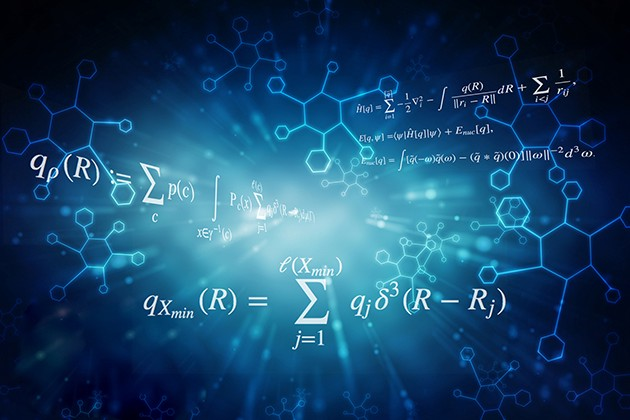

## Problem Statement

Can we predict students' performance in academics in STEM and Non-STEM?
<br>
Is there a difference in STEM and NON-STEM when looking at the performance of students and their features?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE

In [2]:
math_df = pd.read_csv(r'student-mat.csv', sep=';')
por_df = pd.read_csv(r'student-por.csv', sep=';')

In [3]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Data Wrangling and Visualization of the dataset

<ol>
    <li>Filling in missing data</li>
    <li>Smoothing-out noisy data</li>
    <li>Removing outliers and artifacts</li>
    <li>Correcting inconsistent data</li>
    <li>Removing duplicate data</li>
</ol>

## Check for missing values

There seems to be no missing values in the math data set or the poruese language dataset. 

In [5]:
math_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
por_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Check for dulicated values

There are no duplicated values in either of the datasets, so we can move onto the next step.

In [7]:
math_df[math_df.duplicated(keep=False)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [8]:
por_df[por_df.duplicated(keep=False)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


## Histograms of datasets

Many of the histograms are tail heavy, which may impact the performance of the ML alogorithms. We can adjust this to a more bell shaped curve transforming some of the features. The range of values goes from 0 - 500 in most feature spaces. There is not a major need for feature scaling.

### Math Dataset

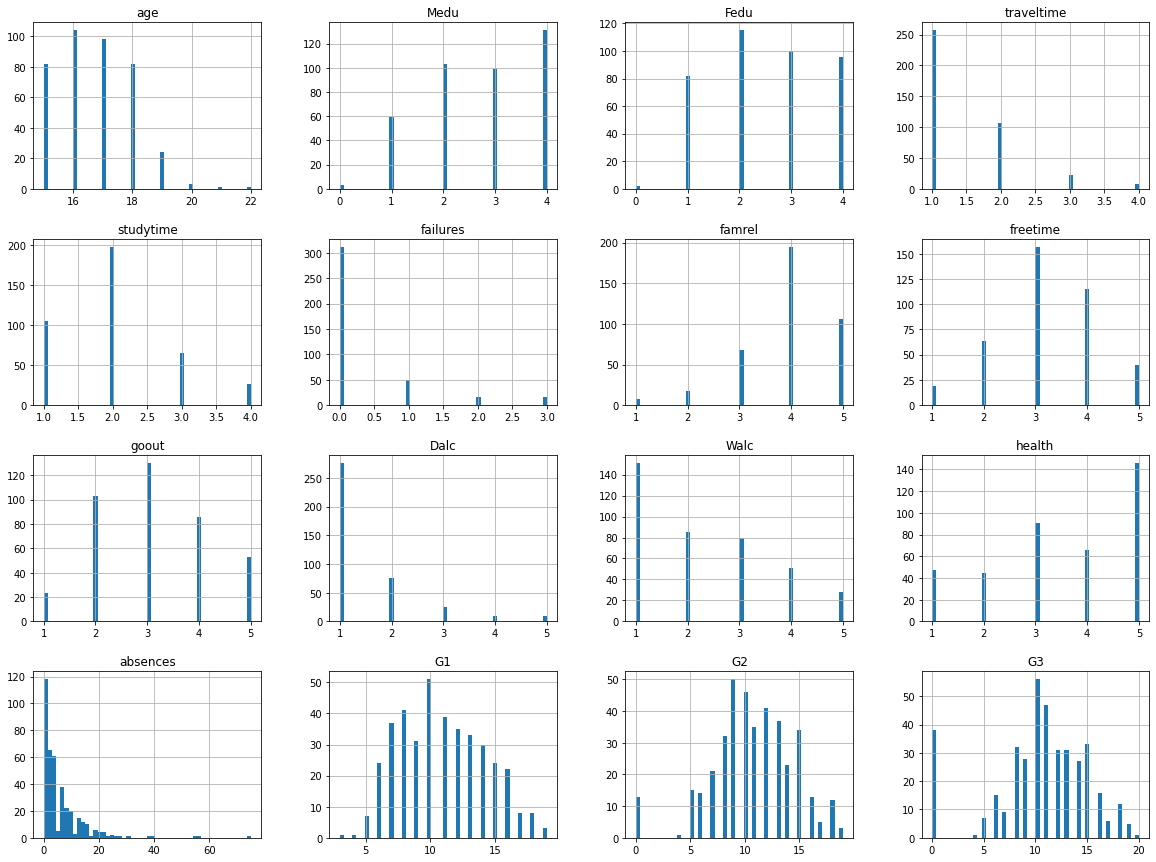

In [9]:
%matplotlib inline 
math_df.hist(bins = 50, figsize = (20, 15))
plt.show()

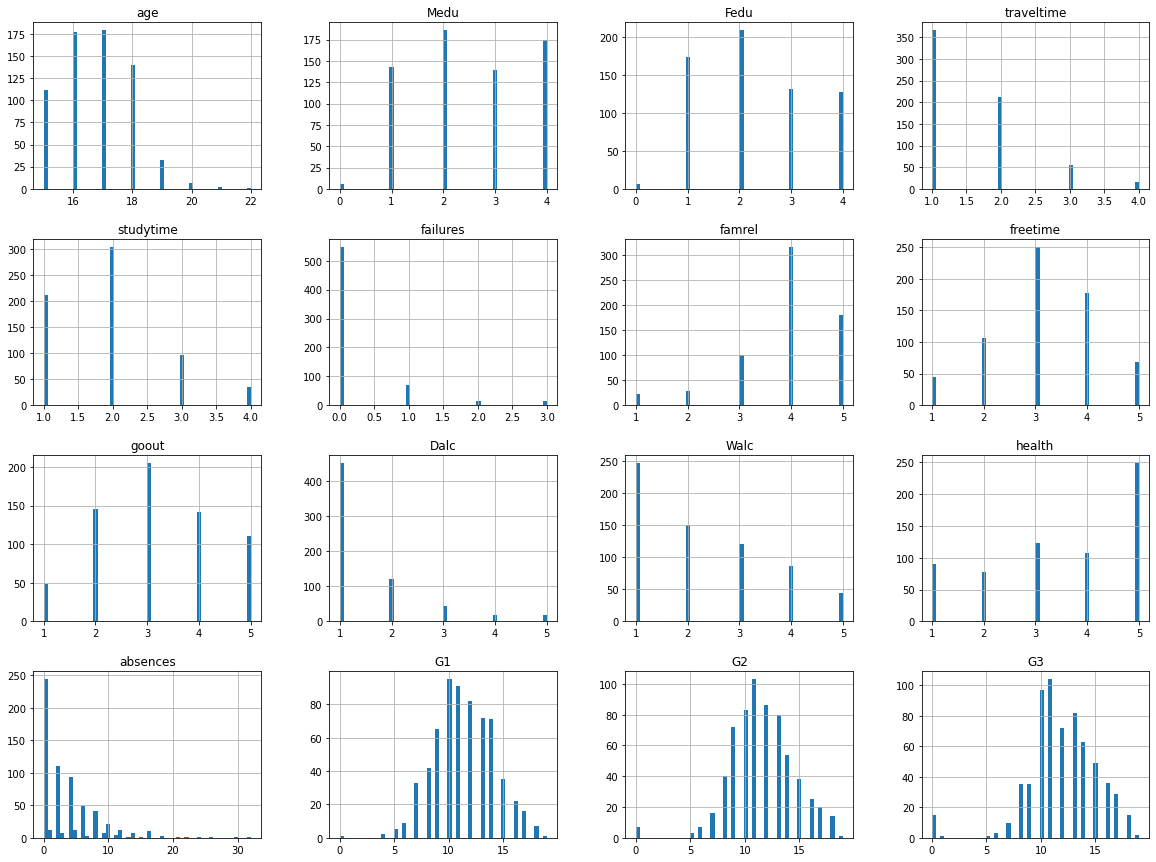

In [10]:
%matplotlib inline 
por_df.hist(bins = 50, figsize = (20, 15))
plt.show()

## Create a Test Set

In [11]:
train_set, test_set = train_test_split(math_df, test_size = 0.2, random_state = 42)

## Look for Correlations in the dataset

The distribution plot of the target variable grades shows it is slightly left skewed. It seems they're might be an outlier with students with a 0 in they're grades. G1, G2 and G3 are highly positvely correlated with each other which makes sense they are first period and second period grades. Fathers and mothers education are also highly positvely correlated with each other. Workday alcohol consumption and weekday alcohol consumption are also highly positvely correlated together. Weekly alcohol content and going out with friends are also highly correlated with each other. Since we have workday and weekend alcohol consumtion, we can remove one of these as they tend to correlate at a greater extent to other features and they are similar. 

C:\Users\alexm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


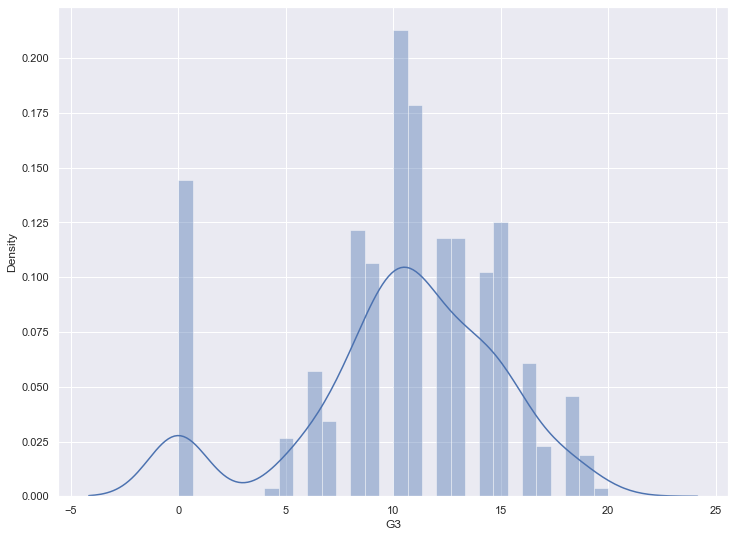

<AxesSubplot:>

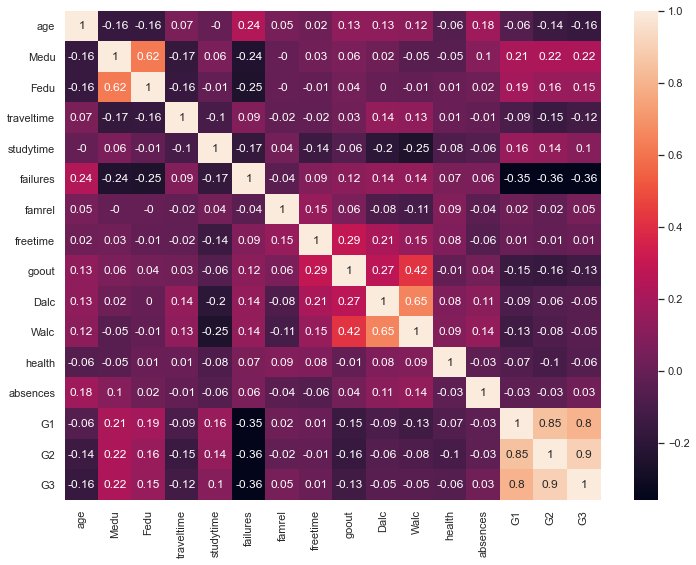

In [12]:
sns.set(rc = {'figure.figsize': (12, 9)})
sns.distplot(math_df['G3'], bins=30)
plt.show()
corr_matrix = math_df.corr().round(2)
sns.heatmap(corr_matrix, annot = True)

## Check the data types of each feature

In [13]:
math_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [14]:
por_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Use one hot encoding to change categorical data

After looking at the data types for the two datasets, we can see that there are data types that are generic objects. These represent cateogirical variables that would need to be encoded for our regression models. Features to change are:

<ol>
    <li>school</li>
    <li>sex</li>
    <li>address</li>
    <li>famsize</li>
    <li>Pstatus</li>
    <li>Mjob</li>
    <li>Fjob</li>
    <li>reason</li>
    <li>guardian</li>
    <li>schoolsup</li>
    <li>famsup</li>
    <li>paid</li>
    <li>activities</li>
    <li>nursery</li>
    <li>higher</li>
    <li>internet</li>
    <li>romantic</li>    
</ol>

In [15]:
math_df_encoded = math_df.copy()
labelencoder = LabelEncoder()
math_df_encoded['school_dummy'] = labelencoder.fit_transform(math_df_encoded["school"])
math_df_encoded['sex_dummy'] = labelencoder.fit_transform(math_df_encoded["sex"])
math_df_encoded['address_dummy'] = labelencoder.fit_transform(math_df_encoded["address"])
math_df_encoded['famsize_dummy'] = labelencoder.fit_transform(math_df_encoded["famsize"])
math_df_encoded['pstatus_dummy'] = labelencoder.fit_transform(math_df_encoded["Pstatus"])
math_df_encoded['fjob_dummy'] = labelencoder.fit_transform(math_df_encoded["Fjob"])
math_df_encoded['mjob_dummy'] = labelencoder.fit_transform(math_df_encoded["Mjob"])
math_df_encoded['reason_dummy'] = labelencoder.fit_transform(math_df_encoded["reason"])
math_df_encoded['guardian_dummy'] = labelencoder.fit_transform(math_df_encoded["guardian"])
math_df_encoded['schoolsup_dummy'] = labelencoder.fit_transform(math_df_encoded["schoolsup"])
math_df_encoded['famsup_dummy'] = labelencoder.fit_transform(math_df_encoded["famsup"])
math_df_encoded['paid_dummy'] = labelencoder.fit_transform(math_df_encoded["paid"])
math_df_encoded['activities_dummy'] = labelencoder.fit_transform(math_df_encoded["activities"])
math_df_encoded['nursery_dummy'] = labelencoder.fit_transform(math_df_encoded["nursery"])
math_df_encoded['higher_dummy'] = labelencoder.fit_transform(math_df_encoded["higher"])
math_df_encoded['internet_dummy'] = labelencoder.fit_transform(math_df_encoded["internet"])
math_df_encoded['romantic_dummy'] = labelencoder.fit_transform(math_df_encoded["romantic"])

In [16]:
cleaned_math_df = math_df_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                                  "pstatus_dummy", "Medu", "Fedu", "mjob_dummy", "fjob_dummy", 
                                  "reason_dummy", "guardian_dummy", "traveltime", "studytime", 
                                  "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                                  "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                                  "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                                  "health", "absences", "G1", "G2", "G3"]]
cleaned_math_df

,school_dummy,sex_dummy,age,address_dummy,famsize_dummy,pstatus_dummy,Medu,Fedu,mjob_dummy,fjob_dummy,...,romantic_dummy,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,4,5,0,11,12,10


## Create a training and test set

In [17]:
train_set, test_set = train_test_split(cleaned_math_df, test_size = 0.2, random_state = 42)

## Select and train the model

### Ridge Regression

In [18]:
X_train, y_train = train_set.iloc[:,:-1], train_set.iloc[:,-1]
model = Ridge(alpha = 0.5, solver = "cholesky")
model.fit(X_train, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [19]:
kf = KFold(n_splits=10, random_state=None)
result = cross_val_score(model , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8185373726760293


### Fine tuning the model using grid search and k fold cross validation 

In [20]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)
print("alpha: %f", model.alpha_)

alpha: %f 0.99


In [21]:
X_test, y_test = test_set.iloc[:,:-1], test_set.iloc[:,-1]
y_pred = model.predict(X_test)

### Metrics

In [22]:
print("------------ Metrics from Ridge Regression model -------------")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

------------ Metrics from Ridge Regression model -------------
Mean Absolute Error:  1.4795796234533658
Mean Squared Error:  5.021702096780747
Root Mean Squared Error:  2.240915459534506


# Predicting Passing Grades

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [24]:
def metrics(test_data, predictions):
    print('Accuracy:', accuracy_score(test_data, predictions))
    print('Precision:', precision_score(test_data, predictions))
    print('Recall:', recall_score(test_data, predictions))
    print('Classification Report:')
    print(classification_report(test_data, predictions, target_names=['pass', 'fail']))
    print('Confusion Matrix:')
    print(confusion_matrix(test_data, predictions))

## Load the dataset, handle data

Here we load the datasets for the two classes and merge them into one. A 'passed' column is created based on G3 (final) scores that indicates whether a student passed their class. The G3 column is then dropped, as that data is the basis for whether or not the student passed. 

In [25]:
dfs = [math_df, por_df]
data = pd.concat(dfs)
data['passed'] = 0
data.loc[data['G3'] >= 10,'passed'] = 1
#data['passed'] = data['G3'] >= 10
data = data.drop(columns=['G3'])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,1


## Use one hot encoding to change categorical data

Here we once again use one hot encoding to pass numerical values instead of other data types

In [26]:
data_encoded = data.copy()
labelencoder = LabelEncoder()
data_encoded['school_dummy'] = labelencoder.fit_transform(data["school"])
data_encoded['sex_dummy'] = labelencoder.fit_transform(data["sex"])
data_encoded['address_dummy'] = labelencoder.fit_transform(data["address"])
data_encoded['famsize_dummy'] = labelencoder.fit_transform(data["famsize"])
data_encoded['pstatus_dummy'] = labelencoder.fit_transform(data["Pstatus"])
data_encoded['fjob_dummy'] = labelencoder.fit_transform(data["Fjob"])
data_encoded['mjob_dummy'] = labelencoder.fit_transform(data["Mjob"])
data_encoded['reason_dummy'] = labelencoder.fit_transform(data["reason"])
data_encoded['guardian_dummy'] = labelencoder.fit_transform(data["guardian"])
data_encoded['schoolsup_dummy'] = labelencoder.fit_transform(data["schoolsup"])
data_encoded['famsup_dummy'] = labelencoder.fit_transform(data["famsup"])
data_encoded['paid_dummy'] = labelencoder.fit_transform(data["paid"])
data_encoded['activities_dummy'] = labelencoder.fit_transform(data["activities"])
data_encoded['nursery_dummy'] = labelencoder.fit_transform(data["nursery"])
data_encoded['higher_dummy'] = labelencoder.fit_transform(data["higher"])
data_encoded['internet_dummy'] = labelencoder.fit_transform(data["internet"])
data_encoded['romantic_dummy'] = labelencoder.fit_transform(data["romantic"])
data_encoded['passed_dummy'] = labelencoder.fit_transform(data["passed"])

In [27]:
data = data_encoded[["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                     "pstatus_dummy", "Medu", "Fedu", "mjob_dummy", "fjob_dummy", 
                     "reason_dummy", "guardian_dummy", "traveltime", "studytime", 
                     "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                     "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                     "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                      "health", "absences", "G1", "G2", "passed_dummy"]]
data

,school_dummy,sex_dummy,age,address_dummy,famsize_dummy,pstatus_dummy,Medu,Fedu,mjob_dummy,fjob_dummy,...,romantic_dummy,famrel,freetime,goout,Walc,health,absences,G1,G2,passed_dummy
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,3,3,10,7,8,1
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,0,5,4,2,2,5,4,10,11,1
645,1,0,18,1,1,1,3,1,4,3,...,0,4,3,4,1,1,4,15,15,1
646,1,0,18,1,0,1,1,1,2,2,...,0,1,1,1,1,5,6,11,12,0
647,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,4,2,6,10,10,1


## Create train and test sets, correct data imbalance with SMOTE

Here the data is processed into X (input data) and y (target feature). Checking the value counts of the target feature revealed a large imbalance in the data, in which students who passed the class made up approximately 78% of the data. Accordingly, SMOTE (Synthetic Minority Oversampling Technique) was leveraged to correct this imbalance by creating synthetic samples based on the data of the minority class. Train and test sets were then derived from the X and y sets in order for the algorithms to be run.

In [28]:
X = data.iloc[:, np.r_[0:31]]
y = data['passed_dummy']

In [29]:
y.value_counts(ascending=True)

0    230
1    814
Name: passed_dummy, dtype: int64

In [30]:
sm = SMOTE(sampling_strategy='auto')
X, y = sm.fit_resample(X, y)

In [31]:
y.value_counts(ascending=True)

0    814
1    814
Name: passed_dummy, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [33]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')

## Decision Tree

In [34]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))
    return

In [35]:
tree_model = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [36]:
y_pred = tree_model.predict(X_test)
metrics(y_test, y_pred)

Accuracy: 0.9434889434889435
Precision: 0.9578947368421052
Recall: 0.9238578680203046
Classification Report:
              precision    recall  f1-score   support

        pass       0.93      0.96      0.95       210
        fail       0.96      0.92      0.94       197

    accuracy                           0.94       407
   macro avg       0.94      0.94      0.94       407
weighted avg       0.94      0.94      0.94       407

Confusion Matrix:
[[202   8]
 [ 15 182]]


In [37]:
printTreeData(tree_model, X_train, y_train, X_test, y_test)

Tree depth: 12
Total leaves: 72
Feature importance: [0.00515109 0.00416227 0.00755924 0.         0.         0.
 0.01175185 0.00373556 0.00481239 0.0119166  0.00733497 0.00540602
 0.01952669 0.00494062 0.00784825 0.00237868 0.0035857  0.00574731
 0.00743191 0.00280832 0.0028555  0.00209194 0.         0.00670825
 0.0026211  0.00812461 0.01304736 0.00638923 0.02071197 0.01976852
 0.80158406]
Train Score: 1.0
Test Score: 0.9434889434889435


### Display Tree

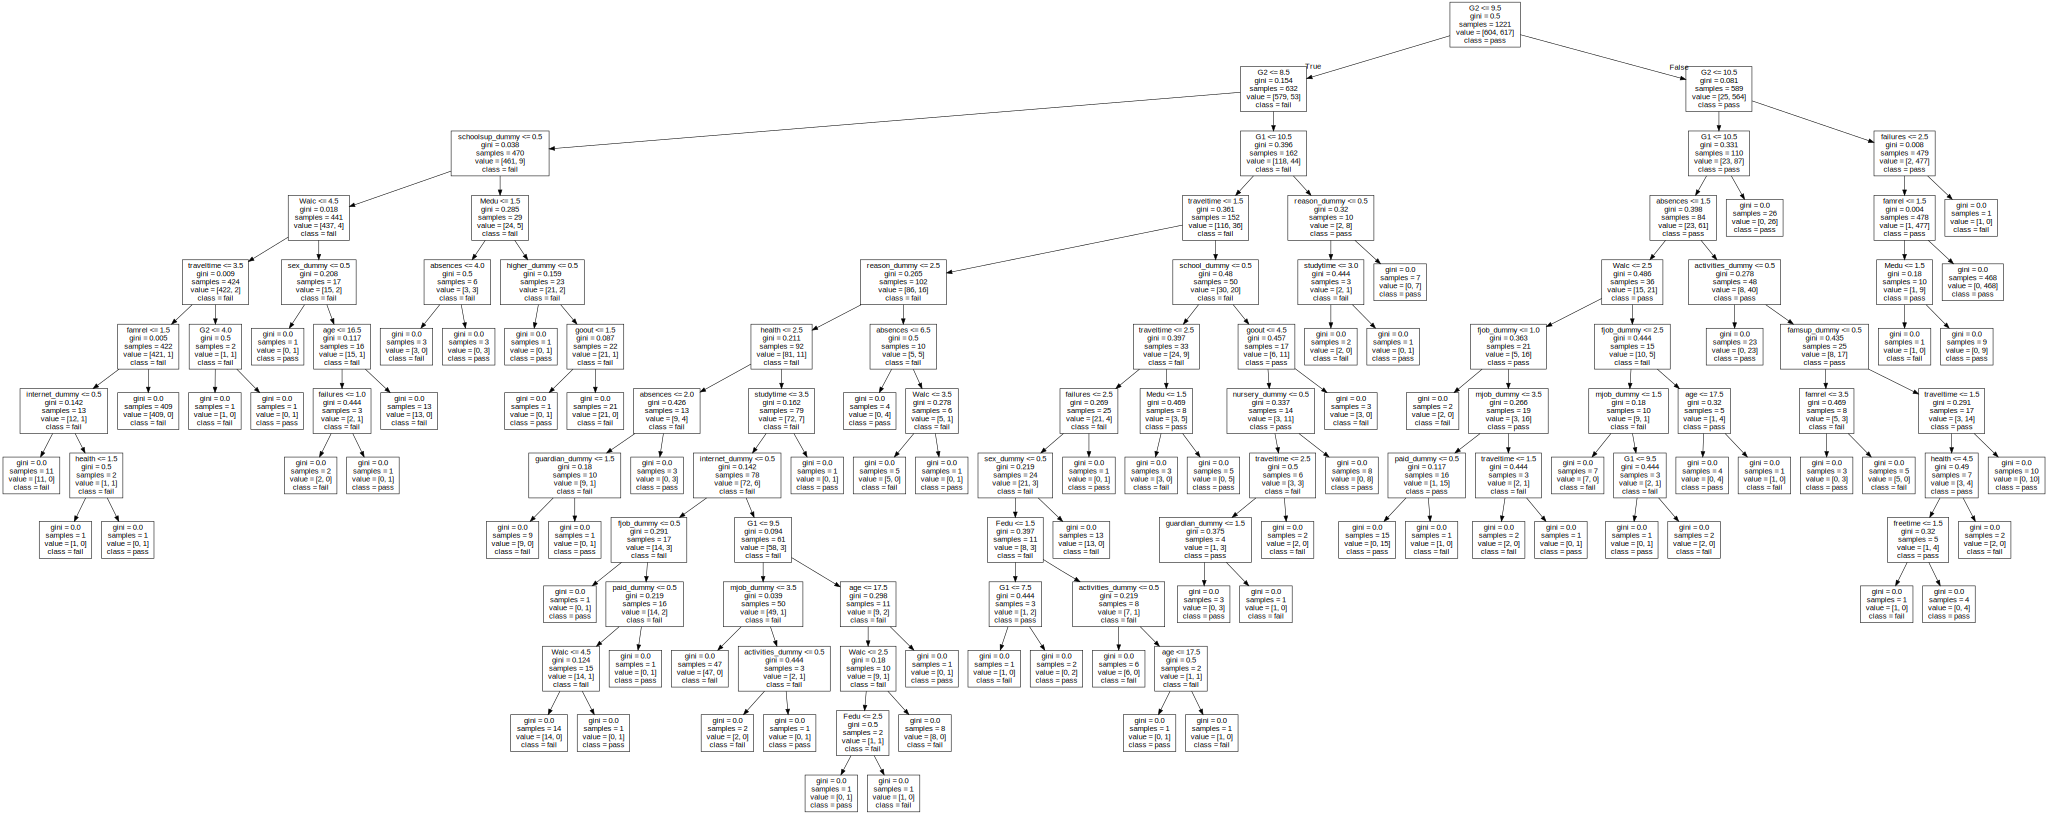

In [38]:
dot_data = tree.export_graphviz(tree_model, feature_names=["school_dummy", "sex_dummy", "age", "address_dummy", "famsize_dummy", 
                                                          "pstatus_dummy", "Medu", "Fedu", "mjob_dummy", "fjob_dummy", 
                                                          "reason_dummy", "guardian_dummy", "traveltime", "studytime", 
                                                          "failures", "schoolsup_dummy", "famsup_dummy", "paid_dummy", 
                                                          "activities_dummy", "nursery_dummy", "higher_dummy", "internet_dummy", 
                                                          "romantic_dummy", "famrel", "freetime", "goout", "Walc",
                                                          "health", "absences", "G1", "G2"], class_names=['fail', 'pass'])
graph = graphviz.Source(dot_data)
graph

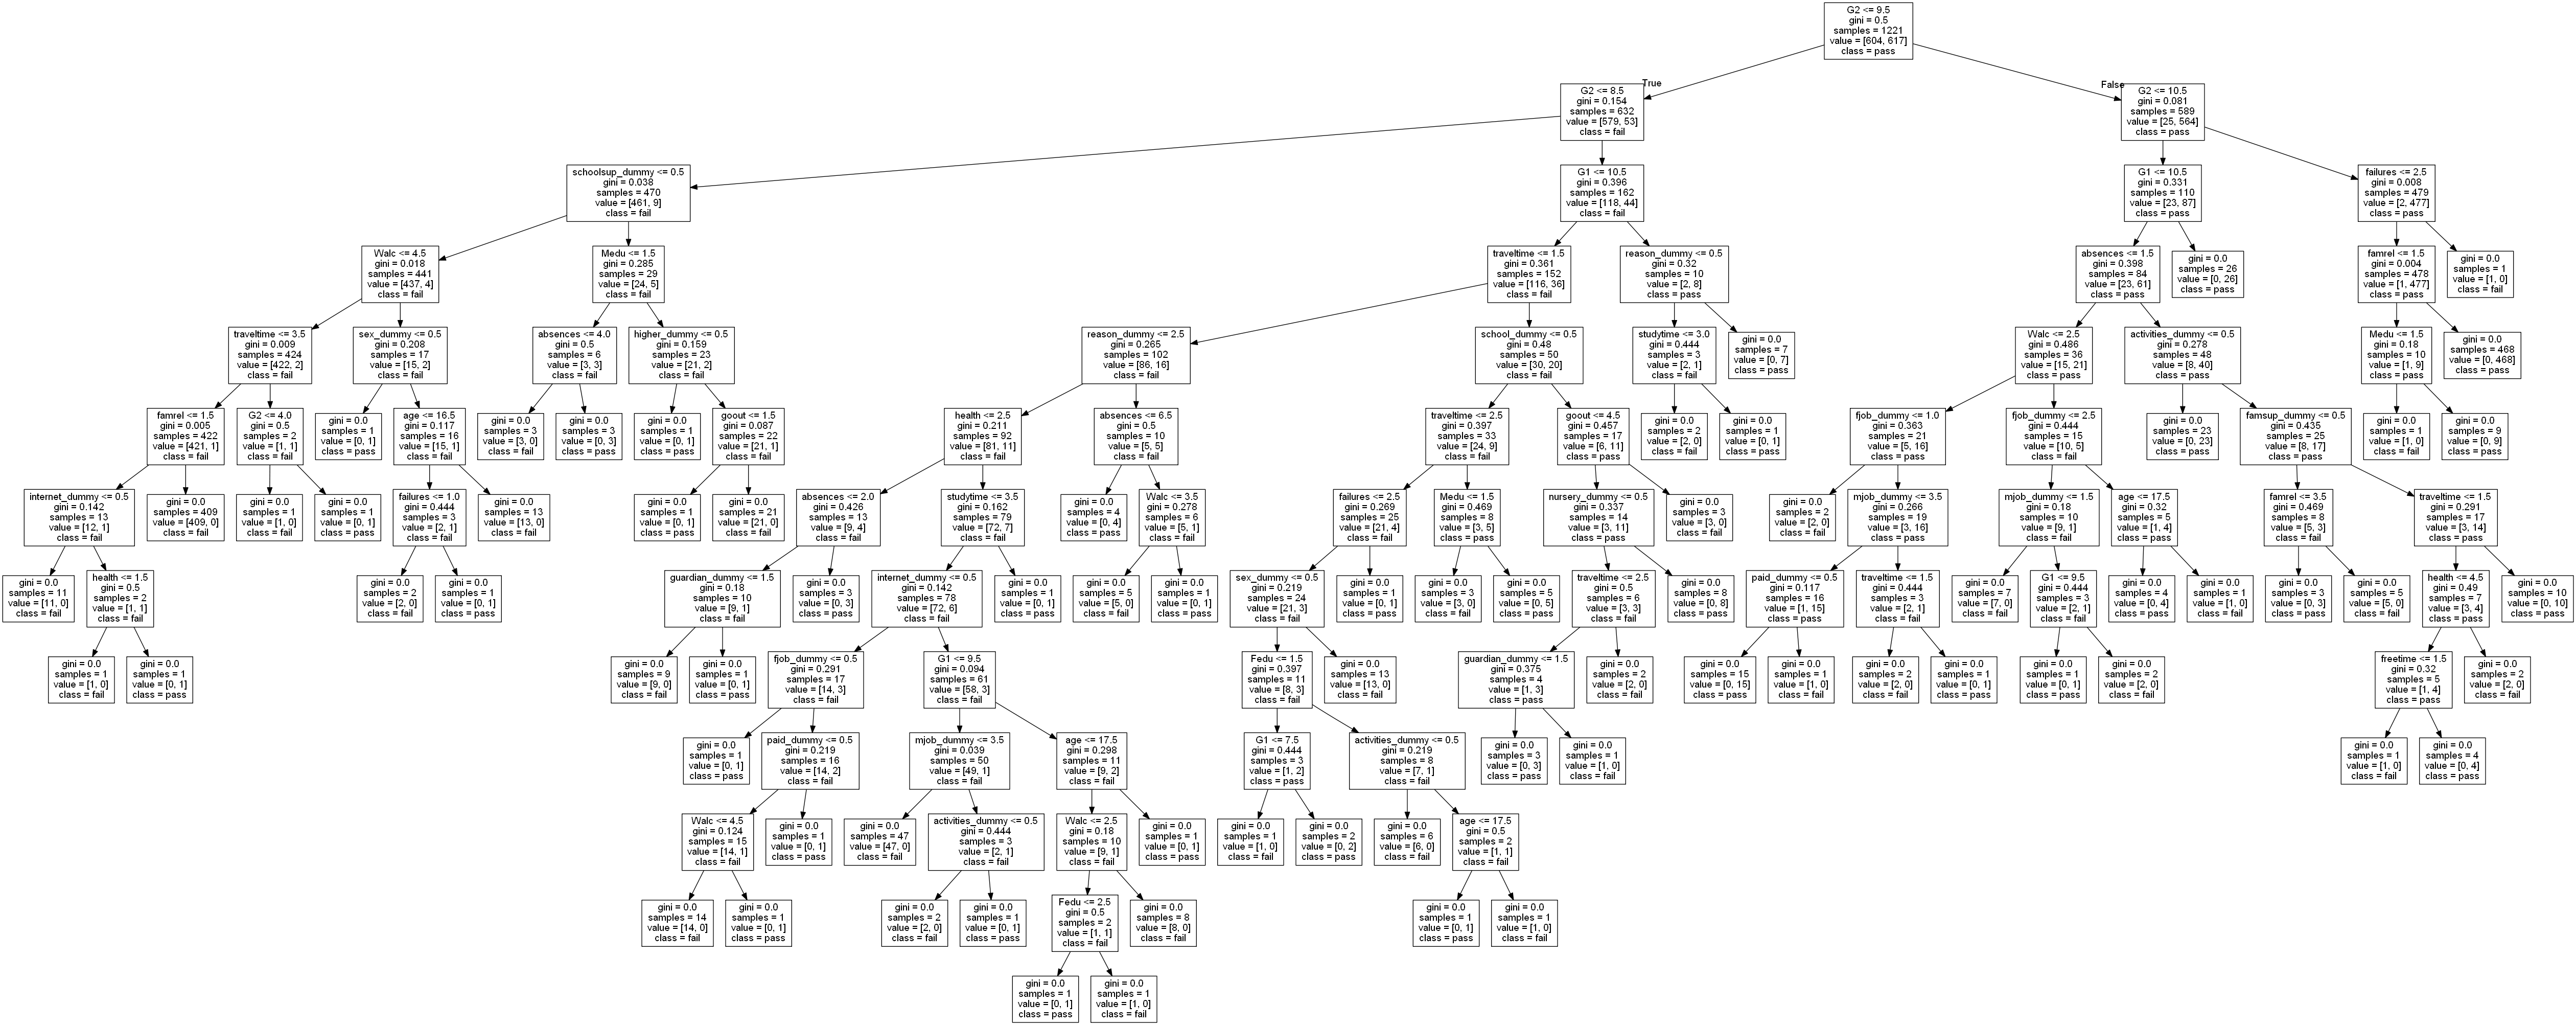

In [39]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Nueral Network

In [40]:
X_train_float = np.asarray(X_train).astype('float32')
y_train_float = np.asarray(y_train).astype('float32').reshape((-1,1))
X_test_float = np.asarray(X_test).astype('float32')
y_test_float = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_tensor = tf.convert_to_tensor(X_train_float)
y_train_tensor = tf.convert_to_tensor(y_train_float)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

In [41]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(31,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=250)
y_pred = model.predict(X_test)

Epoch 1/250
39/39 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7347
Epoch 2/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8625
Epoch 3/250
39/39 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8584
Epoch 4/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.9016
Epoch 5/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8962
Epoch 6/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9143
Epoch 7/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 0.8967
Epoch 8/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1970 - accuracy: 0.9198
Epoch 9/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9011
Epoch 10/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1951 - accuracy: 0.9237
Epoch 11/

39/39 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9408
Epoch 84/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9474
Epoch 85/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.9179
Epoch 86/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9564
Epoch 87/250
39/39 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9139
Epoch 88/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9371
Epoch 89/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1422 - accuracy: 0.9398
Epoch 90/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9524
Epoch 91/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.9317
Epoch 92/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9436
Epoch 93/250


39/39 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.9329
Epoch 165/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9701
Epoch 166/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.9595
Epoch 167/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9498
Epoch 168/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9645
Epoch 169/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9742
Epoch 170/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9601
Epoch 171/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.9468
Epoch 172/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9649
Epoch 173/250
39/39 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.9629
Epoc

39/39 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9874
Epoch 246/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9906
Epoch 247/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9864
Epoch 248/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9911
Epoch 249/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9787
Epoch 250/250
39/39 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9908


In [42]:
results = model.evaluate(X_test_tensor, y_test_tensor)
metrics(y_test, np.rint(y_pred))

13/13 [==============================] - 0s 998us/step - loss: 0.2160 - accuracy: 0.9238
Accuracy: 0.9238329238329238
Precision: 0.8990384615384616
Recall: 0.949238578680203
Classification Report:
              precision    recall  f1-score   support

        pass       0.95      0.90      0.92       210
        fail       0.90      0.95      0.92       197

    accuracy                           0.92       407
   macro avg       0.92      0.92      0.92       407
weighted avg       0.93      0.92      0.92       407

Confusion Matrix:
[[189  21]
 [ 10 187]]


## Logistic Regression

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
y_pred = model.predict(X_test)

In [46]:
metrics(y_test, y_pred)

Accuracy: 0.9213759213759214
Precision: 0.9459459459459459
Recall: 0.8883248730964467
Classification Report:
              precision    recall  f1-score   support

        pass       0.90      0.95      0.93       210
        fail       0.95      0.89      0.92       197

    accuracy                           0.92       407
   macro avg       0.92      0.92      0.92       407
weighted avg       0.92      0.92      0.92       407

Confusion Matrix:
[[200  10]
 [ 22 175]]
